# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
        
     
    return x,vet_r,vec_sol,it

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [3]:
def steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'ro')
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p

        plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')

        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
        
     
    return x,vet_r,vec_sol,it

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [4]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=(r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [5]:
def conjugate_gradient_CL(A,b,x0,X,Y,Z,f,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0

    plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'ro')
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=(r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

In [6]:
def f(x,A,b):
    Ax=A@x
    xAx=x.T@Ax
    bx=b.T@x
    return 0.5*xAx-bx

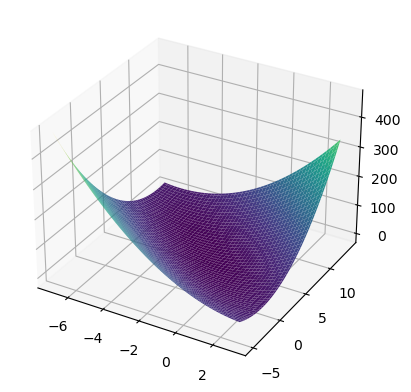

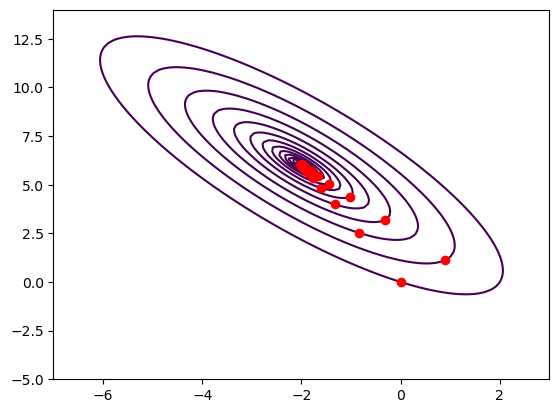

In [7]:
A=np.array([[8,4],[4,3]])
b=np.array([[8],[10]])
x0=np.zeros_like(b)
itmax=200
tol=1e-10

x=np.linspace(-7,3,100)
y=np.linspace(-5,14,100)
X,Y=np.meshgrid(x,y)
Z=np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coord=X[i][j]
        y_coord=Y[i][j]
        Z[i][j]=f(np.array([[x_coord],[y_coord]]),A,b)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
plt.show()

x_sg,vet_r_sg, vec_sol_sg,it_sg = steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)


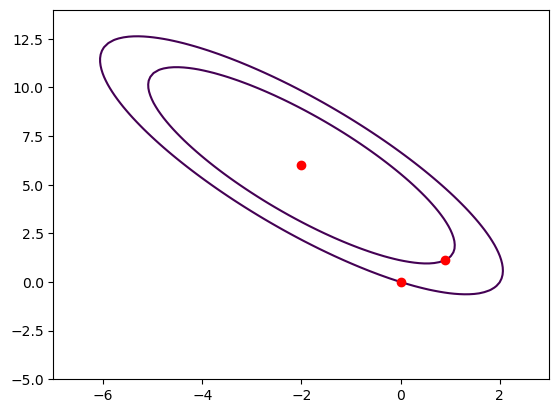

In [8]:
x_cg,vet_r_cg, vec_sol_cg,it_cg = conjugate_gradient_CL(A,b,x0,X,Y,Z,f,itmax,tol)


## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [9]:
def creaPoisson(n):
    A=np.zeros((n,n))
    A=A+4*np.eye(n)+(-1)*np.eye(n,k=1)+(-1)*np.eye(n,k=-1)+(-1)*np.eye(n,k=3)+(-1)*np.eye(n,k=-3)
    return A

indice di condizionamento 690.0605021639757
0.9971058973943132


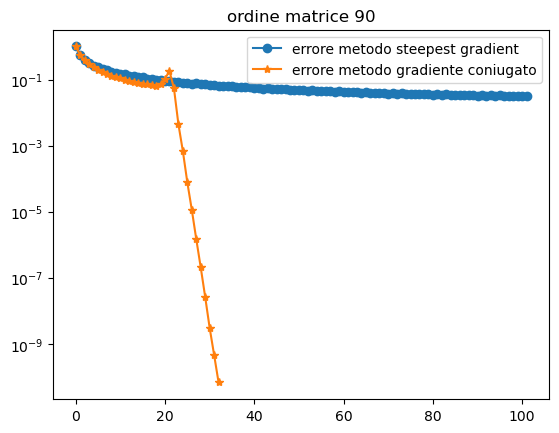

indice di condizionamento 720.3096416677678
0.9972272656783352


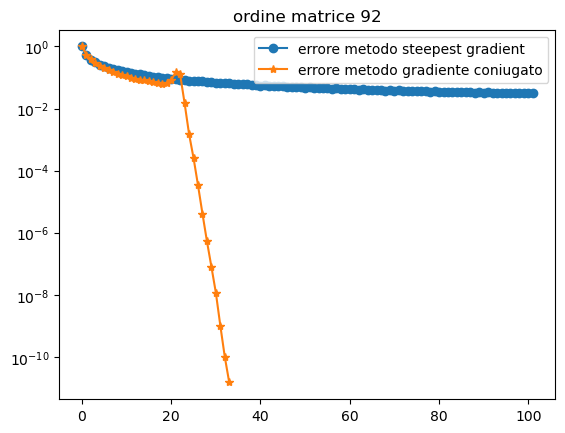

indice di condizionamento 751.2072490406526
0.9973411583010523


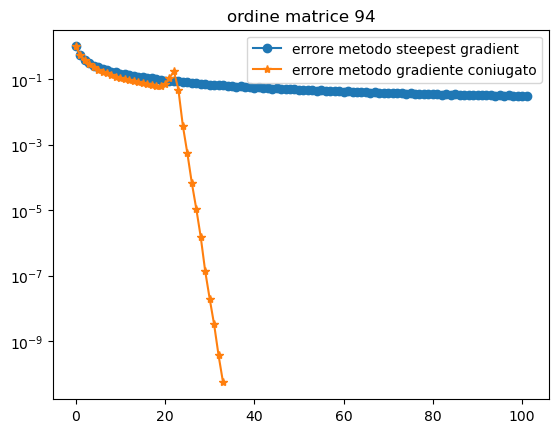

indice di condizionamento 782.7533235170854
0.9974481766903073


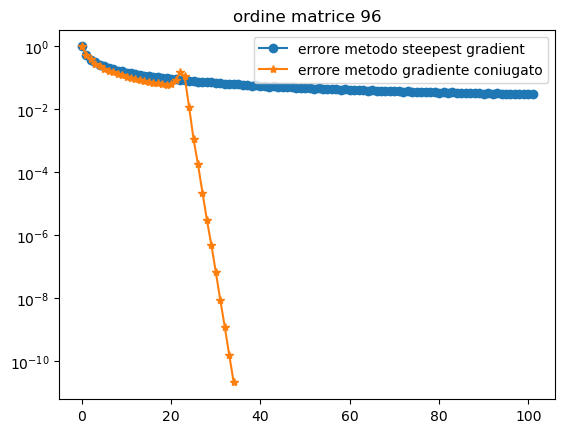

indice di condizionamento 814.9478643935905
0.9975488630005958


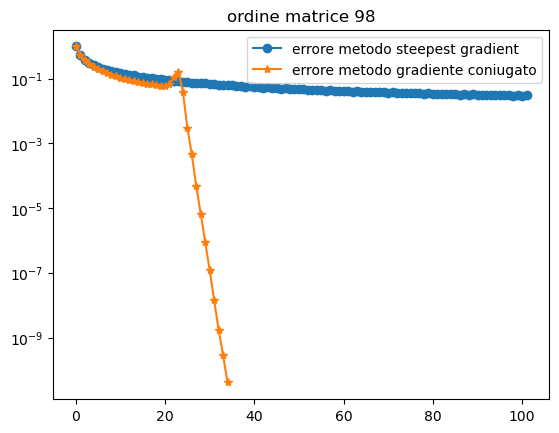

In [10]:
for i in (np.arange(90,100,2)):
    A=creaPoisson(i)
    b=np.sum(A,axis=1).reshape(A.shape[0],1)
    x0=np.zeros((A.shape[0],1))
    print("indice di condizionamento", np.linalg.cond(A))
    print((np.linalg.cond(A)-1)/(np.linalg.cond(A)+1)) #più vicino a uno tanto più è lenta la convergenza

    x_st,vet_r_st,vec_sol_st,it_st=steepestdescent(A,b,x0,100,1e-10)
    x_cg,vet_r_cg,vec_sol_cg,it_cg=conjugate_gradient(A,b,x0,100,1e-10)
    plt.semilogy(np.arange(it_st+1),vet_r_st,'o-', np.arange(it_cg+1),vet_r_cg,'*-')
    plt.title(f"ordine matrice {i}")
    plt.legend(['errore metodo steepest gradient','errore metodo gradiente coniugato'])
    plt.show()

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

indice di condizionamento 476607.25024100044


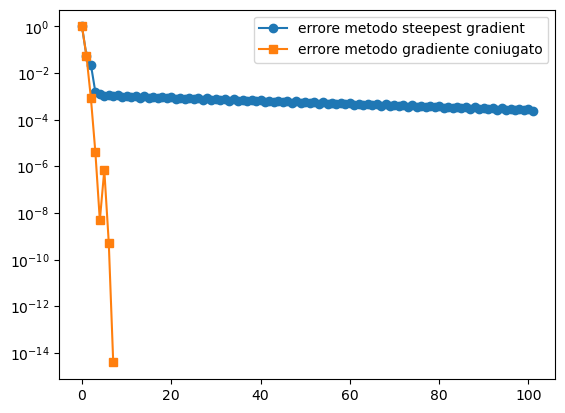

In [11]:
import scipy.linalg
A=scipy.linalg.hilbert(5)
b=np.sum(A,axis=1).reshape(A.shape[0],1)
x0=np.zeros_like(b)
print("indice di condizionamento", np.linalg.cond(A))

x_st,vet_r_st,vec_sol_st,it_st=steepestdescent(A,b,x0,100,1e-10)
x_cg,vet_r_cg,vec_sol_cg,it_cg=conjugate_gradient(A,b,x0,100,1e-10)
plt.semilogy(range(it_st+1),vet_r_st,'o-', range(it_cg+1),vet_r_cg,'s-')
plt.legend(['errore metodo steepest gradient','errore metodo gradiente coniugato'])

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

indice di condizionamento 9.47213595499958
0.8090169943749475


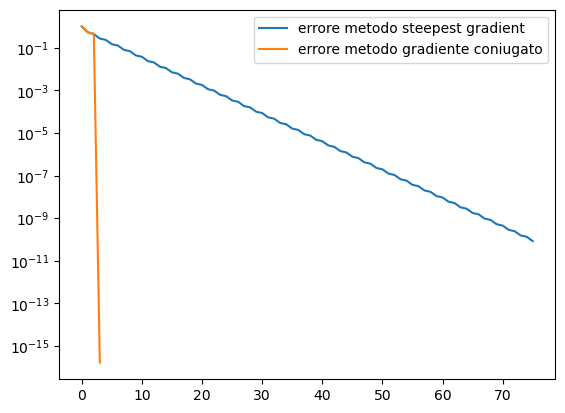

In [14]:
import creaG
n=6
m=(n-2)**2
G = creaG.numgrid(n)
D = creaG.delsq(G).todense().getA()
b=np.sum(D,axis=1).reshape(D.shape[0],1)
x0=np.zeros_like(b)
print("indice di condizionamento", np.linalg.cond(D))
print((np.linalg.cond(D)-1)/(np.linalg.cond(D)+1))


x_st,vet_r_st,vec_sol_st,it_st=steepestdescent(D,b,x0,100,1e-10)
x_cg,vet_r_cg,vec_sol_cg,it_cg=conjugate_gradient(D,b,x0,100,1e-10)
plt.semilogy(range(it_st+1),vet_r_st,'-', range(it_cg+1),vet_r_cg,'-')
plt.legend(['errore metodo steepest gradient','errore metodo gradiente coniugato'])

400
indice di condizionamento 178.06427461086125
0.9888308262251286


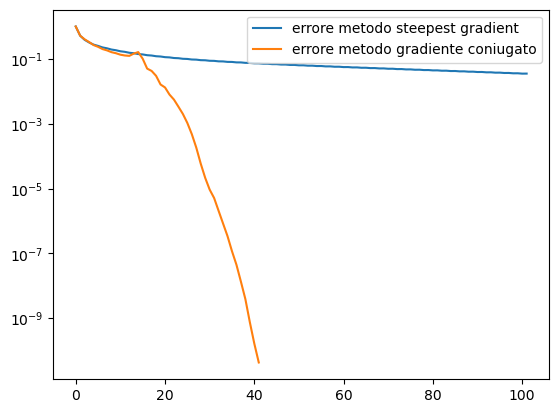

In [15]:
n=22
m=(n-2)**2
print(m)
G = creaG.numgrid(n)
D = creaG.delsq(G).todense().getA()
b=np.sum(D,axis=1).reshape(D.shape[0],1)
x0=np.zeros_like(b)
print("indice di condizionamento", np.linalg.cond(D))
print((np.linalg.cond(D)-1)/(np.linalg.cond(D)+1))

x_st,vet_r_st,vec_sol_st,it_st=steepestdescent(D,b,x0,100,1e-10)
x_cg,vet_r_cg,vec_sol_cg,it_cg=conjugate_gradient(D,b,x0,100,1e-10)
plt.semilogy(np.arange(it_st+1),vet_r_st,'-', np.arange(it_cg+1),vet_r_cg,'-')
plt.legend(['errore metodo steepest gradient','errore metodo gradiente coniugato'])